In [1]:
from datetime import datetime
import pandas as pd

In [2]:
data = {'date': ['2014-05-01 18:47:05', '2014-05-01 18:47:05', '2014-05-02 18:47:05', '2014-05-02 18:47:05', '2014-05-02 18:47:05', '2014-05-02 18:47:05', '2014-06-03 18:47:05', '2014-06-03 18:47:05', '2014-07-04 18:47:05', '2014-07-04 18:47:05'], 
        'some_col': [34, 25, 26, 15, 15, 14, 26, 25, 62, 41]}
df = pd.DataFrame(data, columns = ['date', 'some_col'])
df

,date,some_col
0,2014-05-01 18:47:05,34
1,2014-05-01 18:47:05,25
2,2014-05-02 18:47:05,26
3,2014-05-02 18:47:05,15
4,2014-05-02 18:47:05,15
5,2014-05-02 18:47:05,14
6,2014-06-03 18:47:05,26
7,2014-06-03 18:47:05,25
8,2014-07-04 18:47:05,62
9,2014-07-04 18:47:05,41


# String -> DateTime

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
date        10 non-null object
some_col    10 non-null int64
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
date        10 non-null datetime64[ns]
some_col    10 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 240.0 bytes


# Extracting value from the date

In [6]:
df['day_of_week'] = df['date'].apply(lambda x : int(x.strftime('%w')))
df['month'] = df['date'].apply(lambda x : int(x.strftime('%m')))
# Without 'int' new columns will have 'object' type

Other formats of "strftime" can be found here:
    
https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [7]:
df['day_of_year'] = df['date'].apply(lambda x: x.timetuple().tm_yday)

In [8]:
df

,date,some_col,day_of_week,month,day_of_year
0,2014-05-01 18:47:05,34,4,5,121
1,2014-05-01 18:47:05,25,4,5,121
2,2014-05-02 18:47:05,26,5,5,122
3,2014-05-02 18:47:05,15,5,5,122
4,2014-05-02 18:47:05,15,5,5,122
5,2014-05-02 18:47:05,14,5,5,122
6,2014-06-03 18:47:05,26,2,6,154
7,2014-06-03 18:47:05,25,2,6,154
8,2014-07-04 18:47:05,62,5,7,185
9,2014-07-04 18:47:05,41,5,7,185


# Plotting Dates

In [9]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

In [10]:
# Explicitly registering matplotlib converters (prevents errors)
pd.plotting.register_matplotlib_converters()

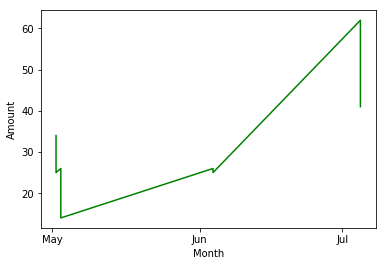

In [11]:
# fmt = '[marker][line][color]'
# Check other Format Strings here: https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
plt.plot_date(df['date'], df['some_col'], fmt='-g')

x_axis = plt.gca().xaxis
x_axis.set_major_locator(mdates.MonthLocator())
x_axis.set_major_formatter(mdates.DateFormatter('%b'))

plt.xlabel('Month')
plt.ylabel('Amount');